# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Objetivos.
Crearuna herramienta para generar mapas de calor (heatmaps) usando funciones de matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-success">
<b>Matplotlib.</b>
    
Para realizar esta práctica, necesitas conocer algunos conceptos y funciones de la biblioteca <b>matplotlib</b>. Para ello debes revisar las notebooks: 
<ul>    
    <li><a href="T16_Matplotlib_Intro.ipynb">T16_Matplotlib_Intro.ipynb</a>.</li>
    <li><a href="T17_Matplotlib_Funciones.ipynb">T17_Matplotlib_Funciones.ipynb</a>.</li>
</ul>
</div>

# Heatmap

Un mapa de calor (*heatmap*) es una representación gráfica de datos numéricos, donde cada dato individual se representa usando un color. De esta manera, es posible simplificar conjuntos de datos numéricos en visualizaciones claras que se pueden entender más fácilmente.

En matplotlib se pueden generar mapas de calo de manera distinta.

## Versión 1.

In [3]:
# Generamos datos de manera pseudo-aleatoria.
data = np.random.random((5, 5))
print(data)

[[0.10185835 0.95239002 0.12574962 0.52517963 0.93415876]
 [0.43318046 0.86899543 0.64324884 0.1093875  0.67109691]
 [0.10290356 0.89766196 0.18306428 0.01265174 0.18847977]
 [0.83831005 0.85057655 0.38107424 0.1076283  0.15852702]
 [0.23152204 0.72325342 0.24392918 0.97476674 0.13088978]]


Usaremos la función `imshow()` para graficar los datos.

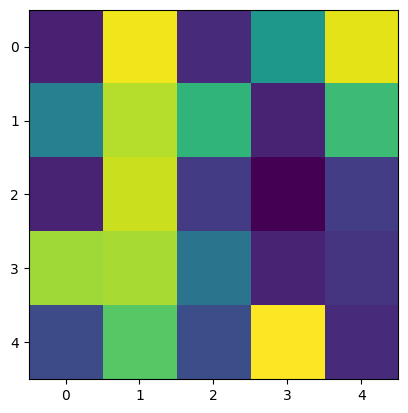

In [4]:
plt.imshow(data)
plt.show()

## Versión 2.
La gráfica anterior muestra ya los datos representados por colores. Para entender mejor esta información, vamos a realizar lo siguiente:

* Definición de etiquetas.
* Datos numéricos sobre el mapa de calor.
* Mapa y barra de color

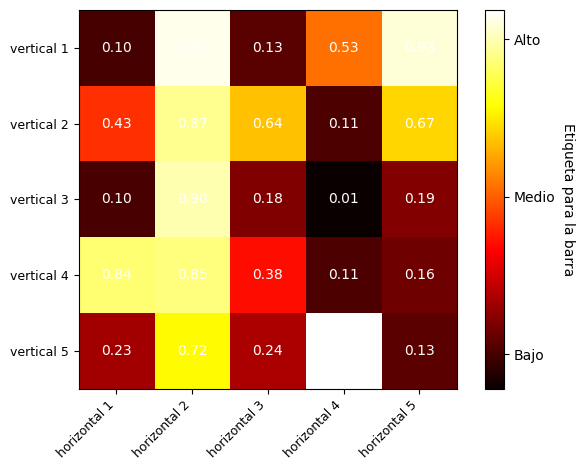

In [8]:
# Definimos un conjunto de etiquetas para los datos
ver = ["vertical 1", "vertical 2", "vertical 3", "vertical 4", "vertical 5"]
hor = ["horizontal {}".format(i) for i in range(1,6)]

# Definimos la figura a través de subplots
fig, ax = plt.subplots()

# Generamos el mapa de calor usando un cmap 
im = ax.imshow(data, cmap="hot")

### Decoramos el mapa de calor con información relevante:

# Definimos las marcas sobre los ejes y las etiquetas
ax.set_xticks(np.arange(len(hor)), labels=hor, rotation=45, ha="right", fontsize=9)
ax.set_yticks(np.arange(len(ver)), labels=ver, fontsize=9)

# Visualizamos la información numérica.
for i in range(len(ver)):
    for j in range(len(hor)):
        text = ax.text(j, i, '{:0.2f}'.format(data[i, j]),
                       ha="center", va="center", color="w")

# Barra de color
cbar = plt.colorbar(im, ticks=[0.1, 0.5, 0.9])
cbar.ax.set_ylabel("Etiqueta para la barra", rotation=-90, va="bottom")
cbar.ax.set_yticklabels(['Bajo', 'Medio', 'Alto'])
      
plt.tight_layout()
plt.savefig('heatmap2.pdf')
plt.show()

## Versión 3.

Aún hay mucho que mejorar, lo siguiente será:

* Ajuste de los ticks y el marco de la gráfica.

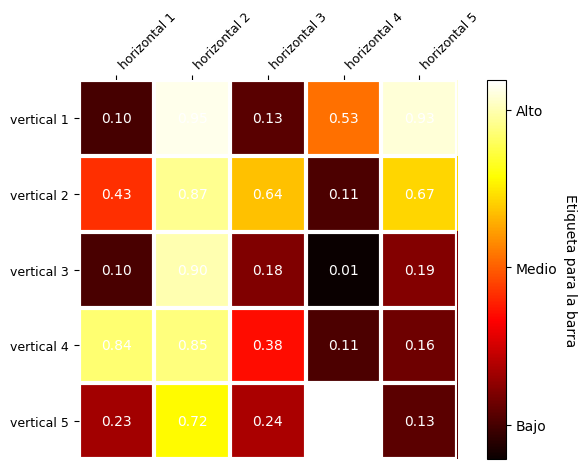

In [9]:
# Obtenemos los ejes de la figura anterior
ax = fig.gca()

# Ponemos las ticks en el top de la figura.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Cambiamos la alineación de las xticks
ax.set_xticks(np.arange(len(hor)), labels=hor, rotation=45, ha="left", fontsize=9)

# Ajustamos los minor ticks para dibujar una rejilla
ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

# Quitamos el marco de los ejes (spines)
ax.spines[:].set_visible(False)

fig.tight_layout()
fig.savefig('heatmap3.pdf')
fig

## Versión 4.

Observa que en la figura anterior algunos números no se logran ver correctamente debido al contraste de colores. Lo que haremos a continuación será:

* Agregar un título al mapa de calor.
* Seleccionamos el color del texto de los datos adecuadamente.

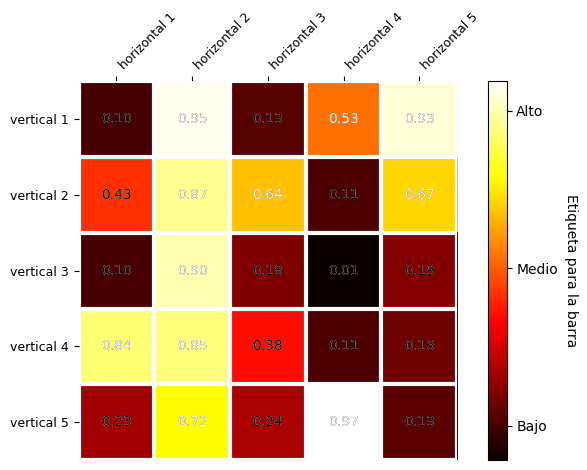

In [12]:
# Obtenemos los ejes de la figura anterior
ax = fig.gca()

# Parámetros para el texto
kw = dict(ha="center", va="center")

text_format = '{:0.2f}' # Formato para el texto
textcolors  = ("black", "white") # Colores para el texto

# Calculamos un umbral. 
# * Usamos "im.norm" para normalizar los datos al intervalo [0,1]
threshold   = im.norm(data.max()) / 2

# Visualizamos la información numérica.
for i in range(len(ver)):
    for j in range(len(hor)):
        # Normalizamos el dato a [0,1]
        # Comparamos con el umbral, si es mayor usamos blanco para el texto, 
        # en otro caso se usa negro. Actualizamos el diccionario de parámetros.
        kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
        
        # Dibujamos el texto usando el formato "text_format".
        text = ax.text(j, i, text_format.format(data[i, j]), **kw)

fig.tight_layout()
fig.savefig('heatmap4.pdf')
fig

## Versión 5.
Finalmente, juntamos todo lo anterior en una función para posteriormente usarla como una herramienta de graficación.

In [66]:
def heatmap_0(data, row_labels, col_labels, ax = None, cbar_label="",
              text_format="{:.2f}", inv_tc=False, 
              **kwargs):
    """
    Crea un mapa de calor a partir de un conjunto de datos.
    
    Parameters
    ----------
    data: 2D `ndarray` 
        Los datos para generar el mapa de calor.
        
    row_labels: `list`
        Lista de etiquetas para el eje vertical.
        
    col_labels: `list`
        Lista de etiquetas para el eje horizontal.
    
    ax: `matplotlib.axes.Axes`
        Los ejes donde se dibujará el mapa de calor. Opcional.
        
    cbar_label: `string`
        Etiqueta para el `colorbar`. Opcional.

    text_format: `string`
        Cadena especificando el formato del texto para los valores numéricos. Opcional.
        
    inv_tc: `bool`
        Si es True se usa (black, white), en otro caso se usa (white,black). Opcional.
        
    **kwargs:
        Argumentos adicionales para `imshow`.
        
    Returns
    -------
        im : `AxesImage`
        cbar: `Colorbar`
        
    """
    # Si no se proporcionan los ejes de manera explícita, se generan o se obtiene los que
    # estén presentes.
    if ax == None:
        ax = plt.gca()
        
    # Generamos el mapa de calor
    im = ax.imshow(data, **kwargs)

    ### Decoramos el mapa de calor con información relevante:

    # Ponemos las ticks en el top de la figura.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Definimos las marcas sobre los ejes y las etiquetas
    ax.set_xticks(np.arange(len(col_labels)), labels=col_labels, rotation=45, ha="left", fontsize=9)
    ax.set_yticks(np.arange(len(row_labels)), labels=row_labels, fontsize=9)

    # Ajustamos los minor ticks para dibujar una rejilla
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Quitamos el marco de los ejes (spines)
    ax.spines[:].set_visible(False)    

    # Parámetros para el texto
    kw = dict(ha="center", va="center")
        
    # Calculamos un umbral. 
    # * Usamos "im.norm" para normalizar los datos al intervalo [0,1]
    threshold   = im.norm(data.max())/2

    # Colores para el texto        
    text_colors  = ("w", "k") if inv_tc else ("k", "w")

    # Visualizamos la información numérica.
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            # Normalizamos el dato a [0,1]
            # Comparamos con el umbral, si es mayor usamos blanco para el texto, 
            # en otro caso se usa negro. Actualizamos el diccionario de parámetros.
            kw.update(color=text_colors[int(im.norm(data[i, j]) > threshold)])

            # Dibujamos el texto usando el formato "text_format".
            text = ax.text(j, i, text_format.format(data[i, j]), **kw)    

    # Barra de color
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
    
    plt.tight_layout()
    return im, cbar

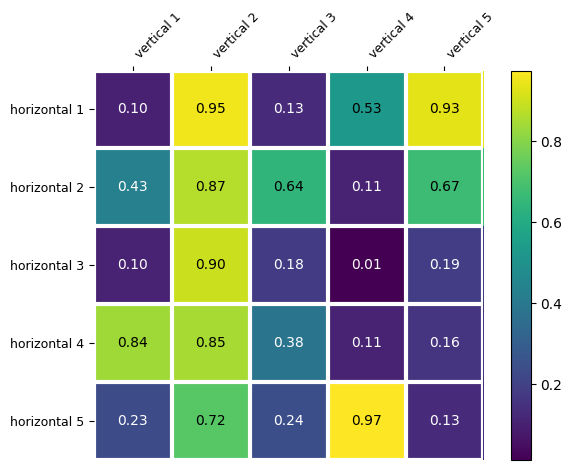

In [70]:
heatmap_0(data, hor, ver)
plt.savefig('heatmap5.pdf')

(<matplotlib.image.AxesImage at 0x7f20304c07d0>,
 <matplotlib.colorbar.Colorbar at 0x7f2030557490>)

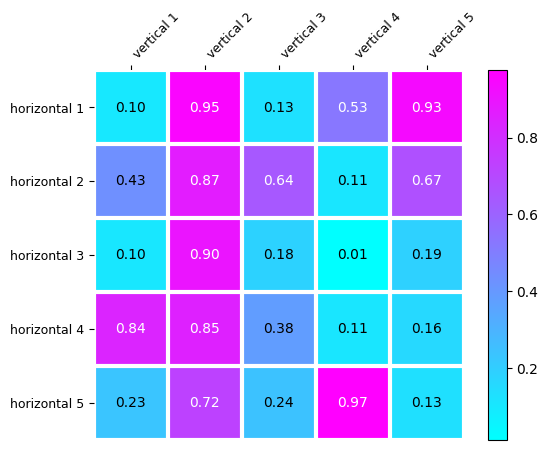

In [29]:
heatmap_0(data, hor, ver, cmap='cool')

### Ejemplo de aplicación.

Usaremos los datos que usan en este ejemplo: [airlines delays](https://www.kaggle.com/code/alexisbcook/bar-charts-and-heatmaps).  Cada dato de la tabla muestra en minutos el tiempo de retraso de llegada de los vuelos para diferentes aerolíneas, por mes durante el año 2015. Los número negativos significan que los vuelos llegaron anticipadamente.

Para leer los datos y maninuparlos un poco usaremos la biblioteca [Pandas](https://pandas.pydata.org/). Esto lo revisaremos con más detalle posteriormente.

In [30]:
import pandas as pd

In [31]:
vuelos = pd.read_csv('../utils/data/flight_delays.csv')
vuelos

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


Vamos a usar la columna del mes (**Month**) como el índice de los renglones

In [32]:
vuelos = pd.read_csv('../utils/data/flight_delays.csv', index_col="Month")
vuelos

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


In [33]:
vuelos.index # revisamos la cantidad de renglones

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

In [34]:
vuelos.columns # revisamos los nombres de las columnas

Index(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN'],
      dtype='object')

In [35]:
# Transformamos los nombre de los renglones y columnas en listas
# para manipularlos de una mejor manera en este ejemplo
meses = list(vuelos.index)
aerolineas = list(vuelos.columns)
print(meses)
print(aerolineas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN']


In [36]:
#Transformamos los datos en un arreglo de numpy:   
np.asarray(vuelos)

array([[ 6.95584343e+00, -3.20888145e-01,  7.34728054e+00,
        -2.04384698e+00,  8.53749688e+00,  1.83572383e+01,
         3.51264045e+00,  1.81649739e+01,  1.13980538e+01,
         1.08898939e+01,  6.35272864e+00,  3.10745736e+00,
         1.42070153e+00,  3.38946563e+00],
       [ 7.53020441e+00, -7.82923179e-01,  1.86576728e+01,
         5.61474522e+00,  1.04172360e+01,  2.74241785e+01,
         6.02996709e+00,  2.13016267e+01,  1.64744656e+01,
         9.58889491e+00,  7.26066189e+00,  7.11445508e+00,
         7.78441046e+00,  3.50136347e+00],
       [ 6.69358686e+00, -5.44730910e-01,  1.07413175e+01,
         2.07796536e+00,  6.73010120e+00,  2.00748547e+01,
         3.46838259e+00,  1.10184176e+01,  1.00391182e+01,
         3.18169313e+00,  4.89221152e+00,  3.33078729e+00,
         5.34820684e+00,  3.26334063e+00],
       [ 4.93177754e+00, -3.00900252e+00,  2.78010543e+00,
         8.33426060e-02,  4.82125273e+00,  1.26404399e+01,
         1.10215496e-02,  5.13122776e+00,  8.

(<matplotlib.image.AxesImage at 0x7f2029e23f90>,
 <matplotlib.colorbar.Colorbar at 0x7f2029c4a550>)

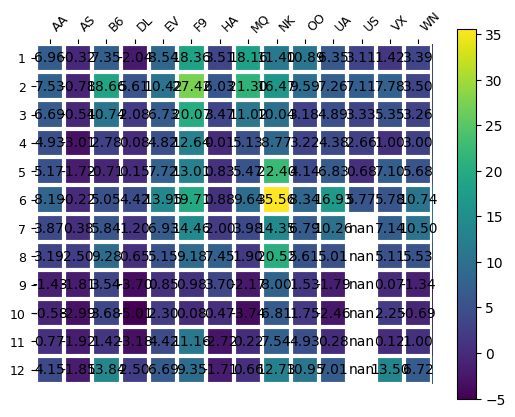

In [37]:
# Ahora usamos nuestra herramienta heatmap_0 para generar un mapa de calor
heatmap_0(np.asarray(vuelos), meses, aerolineas)

## Versión 6.
Lo que observamos en la figura anterior, fue que el mapa de calor no se generó adecuadamente. Vamos a modificar la función como sigue:


In [71]:
def heatmap(data, row_labels, col_labels, annot=True, 
            title = "", ax = None,
            cbar_kw = None, cbar_label = "", text_kw = None,
            text_format = "{:.2f}", inv_tc=False, 
            **kwargs):
    """
    Crea un mapa de calor a partir de un conjunto de datos.
    
    Parameters
    ----------
    data: 2D `ndarray` 
        Los datos para generar el mapa de calor.
        
    row_labels: `list`
        Lista de etiquetas para el eje vertical.
        
    col_labels: `list`
        Lista de etiquetas para el eje horizontal.
    
    ax: `matplotlib.axes.Axes`
        Los ejes donde se dibujará el mapa de calor. Opcional.
        
    cbar_kw: `dict`
        Diccionario con los argumentos para el `colorbar`. Opcional.
        
    cbar_label: `string`
        Etiqueta para el `colorbar`. Opcional.

    text_kw: `dict`
        Diccionario con los argumentos para el `Text`. Opcional.
        
    text_format: `string`
        Cadena especificando el formato del texto para los valores numéricos. Opcional.
        
    inv_tc: `bool`
        Si es True se usa (black, white), en otro caso se usa (white,black). Opcional.
        
    **kwargs:
        Argumentos adicionales para `imshow`.
        
    Returns
    -------
        im : `AxesImage`
        cbar: `Colorbar`
        
    """
    # Si no se proporcionan los ejes de manera explícita, se generan o se obtiene los que
    # estén presentes.
    if ax == None: ax = plt.gca()
    
    ax.set_title(title)
    
    # Generamos el mapa de calor
    im = ax.imshow(data, **kwargs)

    ### Decoramos el mapa de calor con información relevante:

    # Ponemos las ticks en el top de la figura.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Definimos las marcas sobre los ejes y las etiquetas
    ax.set_xticks(np.arange(len(col_labels)), labels=col_labels, rotation=45, ha="left", fontsize=9)
    ax.set_yticks(np.arange(len(row_labels)), labels=row_labels, fontsize=9)

    # Ajustamos los minor ticks para dibujar una rejilla
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Quitamos el marco de los ejes (spines)
    ax.spines[:].set_visible(False)    
        
    # Calculamos un umbral. 
    # * Usamos "im.norm" para normalizar los datos al intervalo [0,1]
    threshold   = im.norm(data.max())/2

    # Argumentos para el texto
    if text_kw == None: text_kw = {}
    text_kw.update(ha="center", va = "center")
    
    if annot:
        # Colores para el texto        
        text_colors  = ("w", "k") if inv_tc else ("k", "w")
    
        # Visualizamos la información numérica.
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                # Normalizamos el dato a [0,1]
                # Comparamos con el umbral, si es mayor usamos blanco para el texto, 
                # en otro caso se usa negro. Actualizamos el diccionario de parámetros.
                text_kw.update(color=text_colors[int(im.norm(data[i, j]) > threshold)])

                # Dibujamos el texto usando el formato "text_format".
                text = ax.text(j, i, text_format.format(data[i, j]), **text_kw)    

    # Barra de color
    if cbar_kw == None: cbar_kw = {}

    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", "5%", pad="3%")
    
    cbar = plt.colorbar(im, cax=cax, **cbar_kw)
    cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
    plt.tight_layout()

    plt.tight_layout()
    return im, cbar

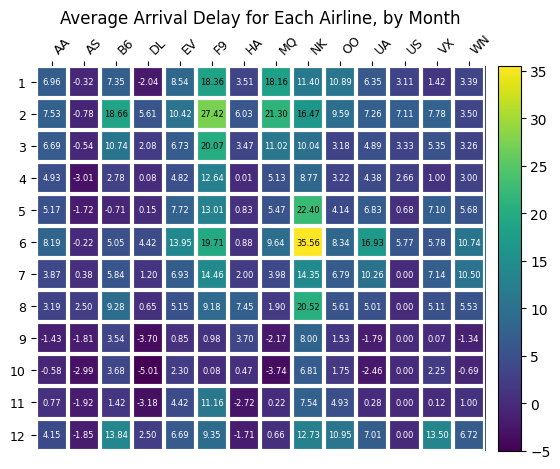

In [72]:
cbar_kw = dict(ticks=[])
text_kw = dict(fontsize=6)
title = "Average Arrival Delay for Each Airline, by Month"

heatmap(np.asarray(vuelos.fillna(0)), meses, aerolineas, title=title,
        text_kw = text_kw, inv_tc=True)
plt.savefig('heatmap6.pdf')

Ahora, en vez de poner un número en el renglón, ponemos el nombre del mes.

In [73]:
min_month = "2023-01"
max_month = "2023-12"

months = pd.period_range(min_month, max_month, freq='M')
print(months)

print(months.strftime("%B"))

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]')
Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')


(<matplotlib.image.AxesImage at 0x7f2010948510>,
 <matplotlib.colorbar.Colorbar at 0x7f2010a3c350>)

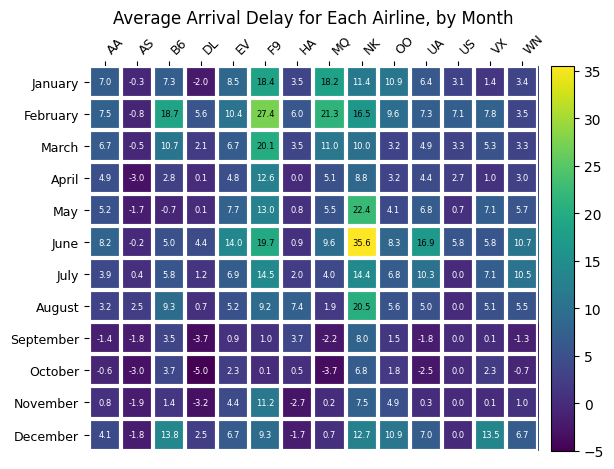

In [75]:
heatmap(np.asarray(vuelos.fillna(0)), list(months.strftime("%B")), aerolineas, 
        title=title, text_kw = text_kw, text_format='{:.1f}',inv_tc=True)
plt.show()

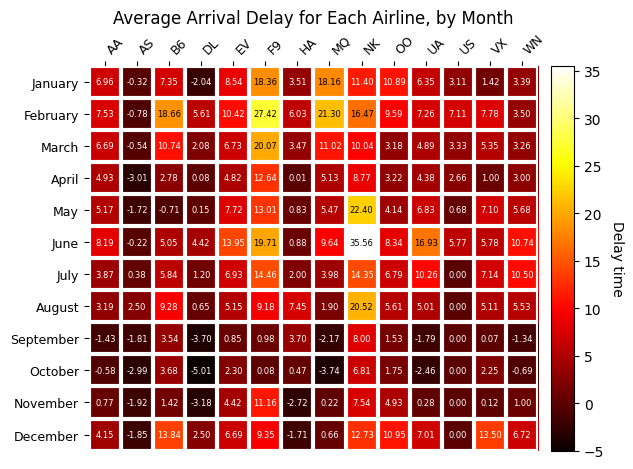

In [76]:
heatmap(np.asarray(vuelos.fillna(0)), list(months.strftime("%B")), aerolineas, 
        title = title, text_kw = text_kw, cbar_label="Delay time", inv_tc=True, cmap='hot')

plt.savefig('my_heatmap.pdf')
plt.show()

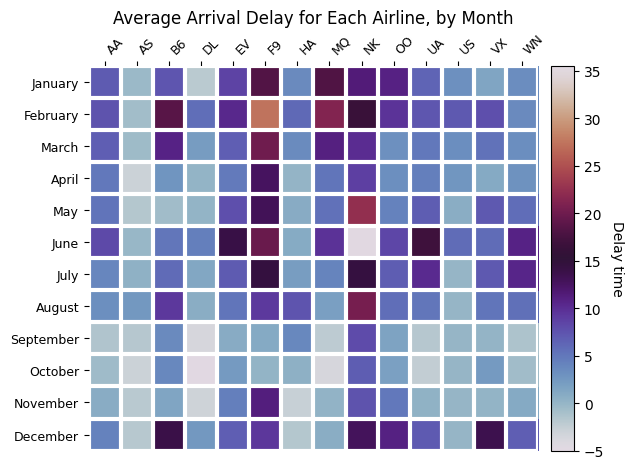

In [77]:
heatmap(np.asarray(vuelos.fillna(0)), list(months.strftime("%B")), aerolineas, 
        title = title, annot = False, cbar_label="Delay time", cmap='twilight')
plt.show()

## Versión Seaborn.

Text(0.5, 1.0, 'Average Arrival Delay for Each Airline, by Month')

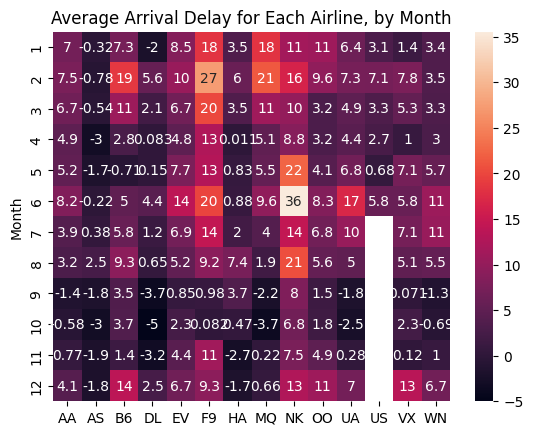

In [78]:
import seaborn as sns
sns.heatmap(data=vuelos, annot=True)
plt.savefig('sbn_heatmap.pdf')
plt.title(title)